In [1]:
from flow import MaximalFlow

In [2]:
vertices = {'s':[0, 0],
            'a':[1, 2],
            'e':[1, 0.6667],
            'i':[1, -0.6667],
            'm':[1, -2],
            'b':[2, 2],
            'f':[2, 0.6667],
            'j':[2, -0.6667],
            'n':[2, -2],
            'c':[3, 2],
            'g':[3, 0.6667],
            'k':[3, -0.6667],
            'o':[3, -2],
            'd':[4, 2],
            'h':[4, 0.6667],
            'l':[4, -0.6667],
            'p':[4, -2],
            't':[5, 0]
           }
capacity = {('s', 'a'):9,
            ('s', 'e'):8,
            ('s', 'i'):7,
            ('s', 'm'):3,
            ('a', 'b'):2,
            ('a', 'n'):6,
            ('e', 'f'):6,
            ('i', 'f'):2,
            ('i', 'j'):2,
            ('m', 'j'):2,
            ('m', 'n'):4,
            ('b', 'c'):6,
            ('b', 'e'):4,
            ('b', 'g'):3,
            ('f', 'c'):6,
            ('f', 'g'):1,
            ('f', 'k'):3,
            ('j', 'g'):4,
            ('j', 'k'):5,
            ('j', 'o'):6,
            ('n', 'k'):1,
            ('n', 'o'):3,
            ('c', 'd'):2,
            ('c', 'h'):4,
            ('g', 'h'):6,
            ('g', 'l'):8,
            ('k', 'l'):1,
            ('k', 'p'):1,
            ('o', 'd'):6,
            ('o', 'p'):4,
            ('d', 't'):7,
            ('h', 't'):2,
            ('l', 't'):7,
            ('p', 't'):6,
           }

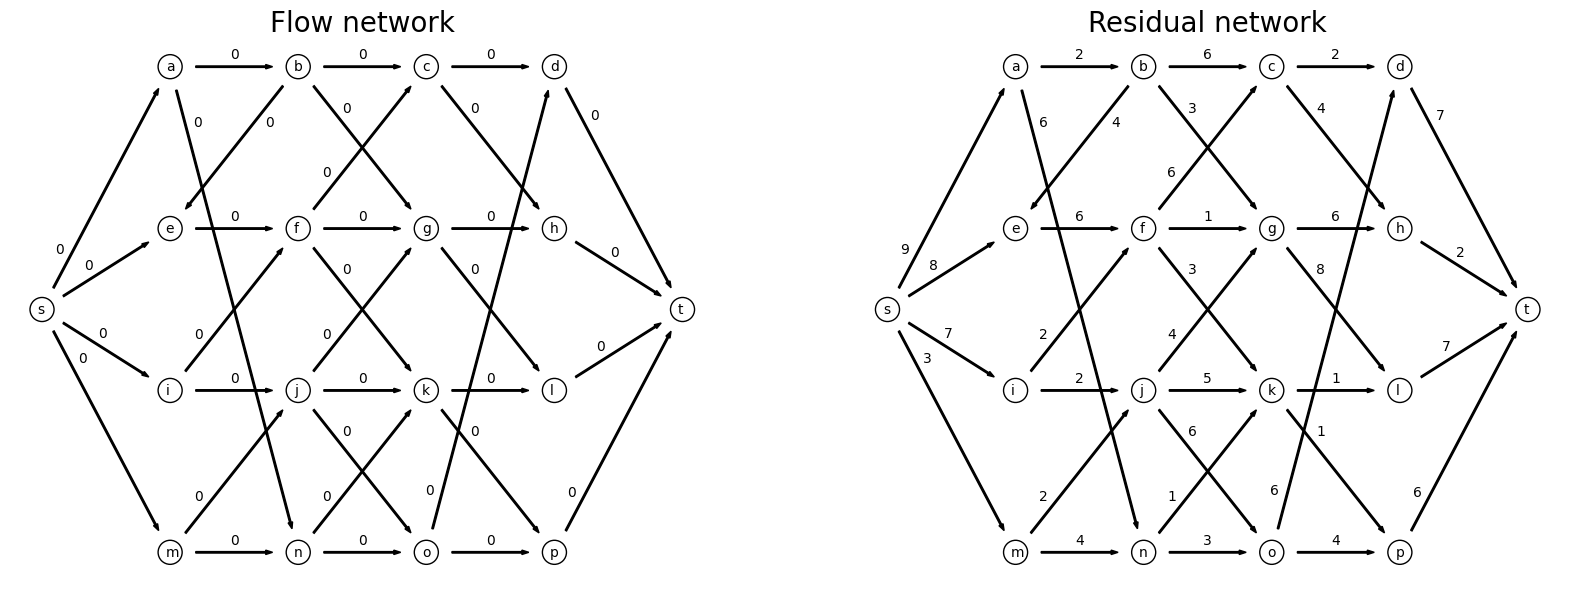

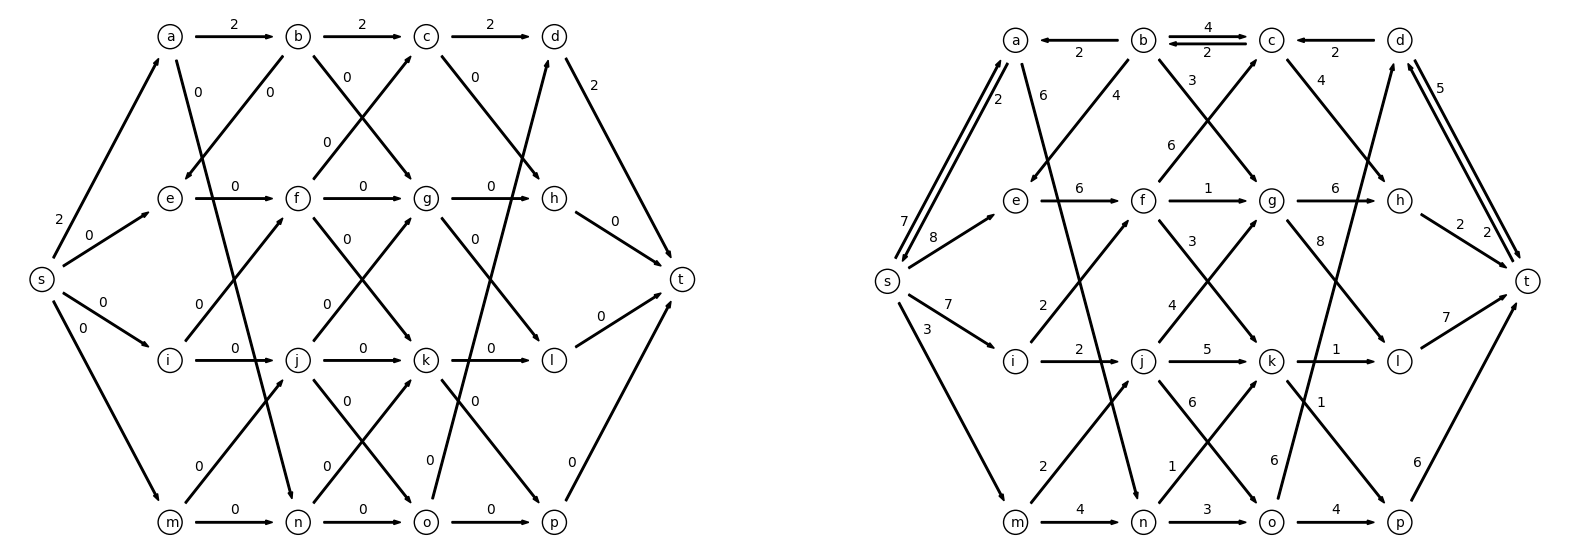

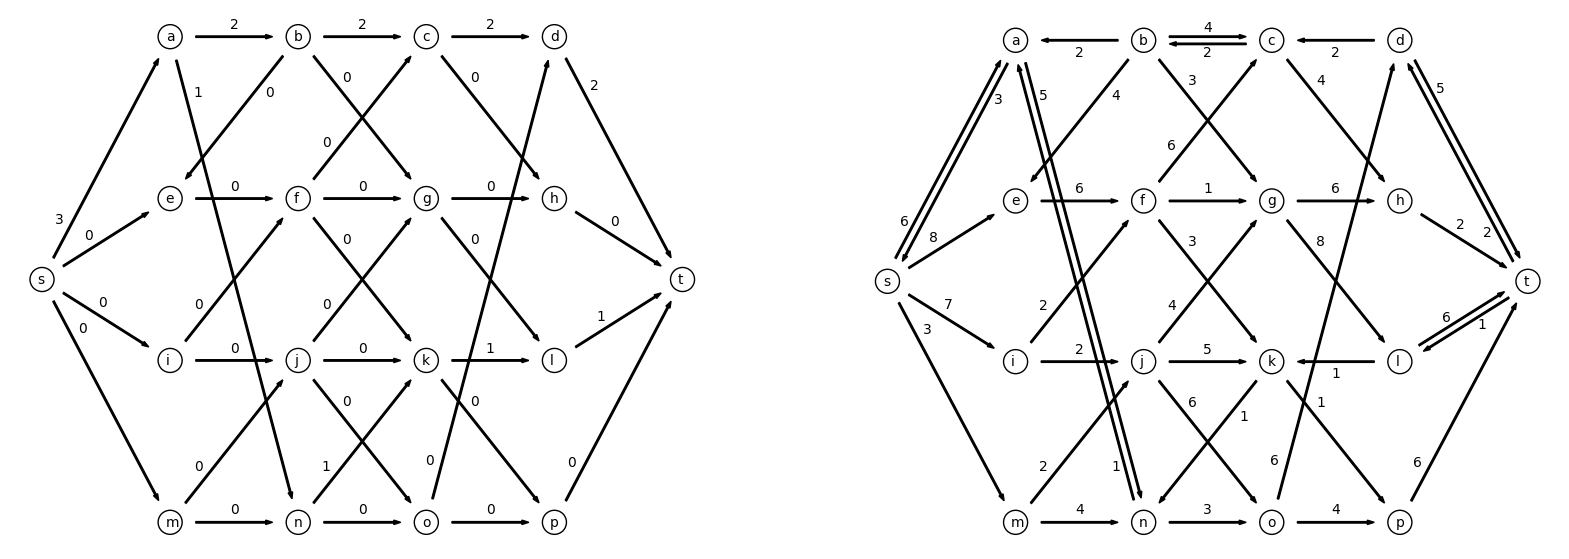

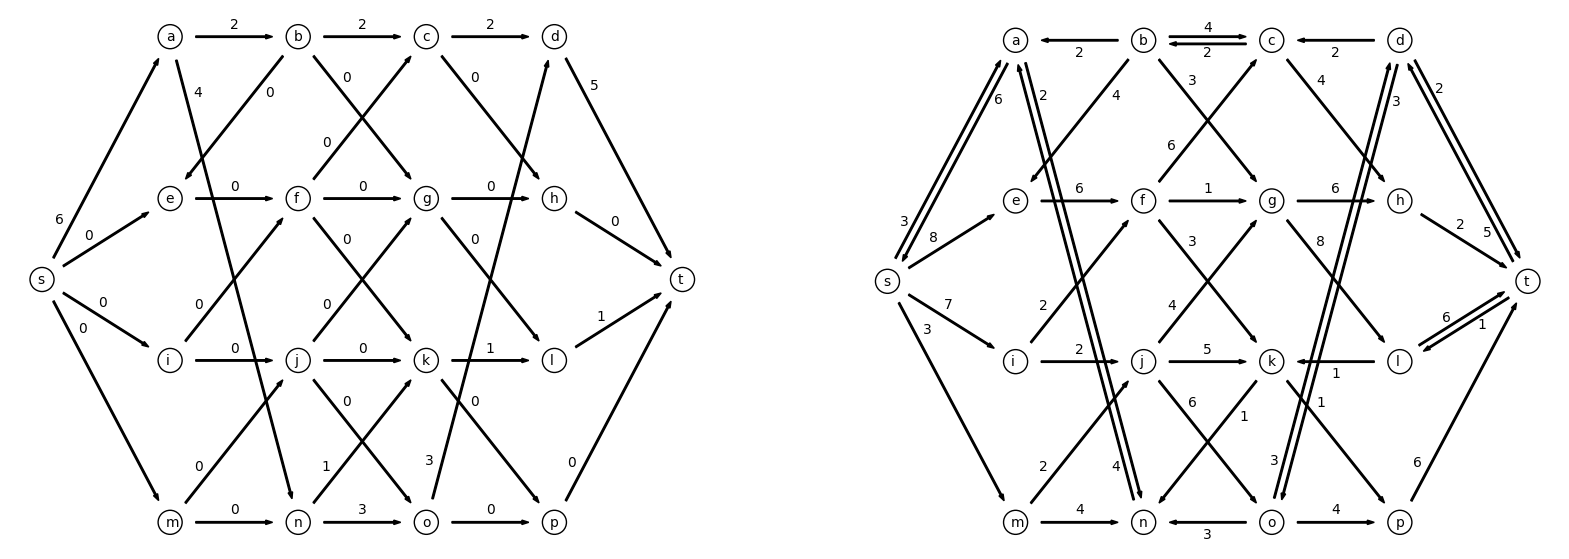

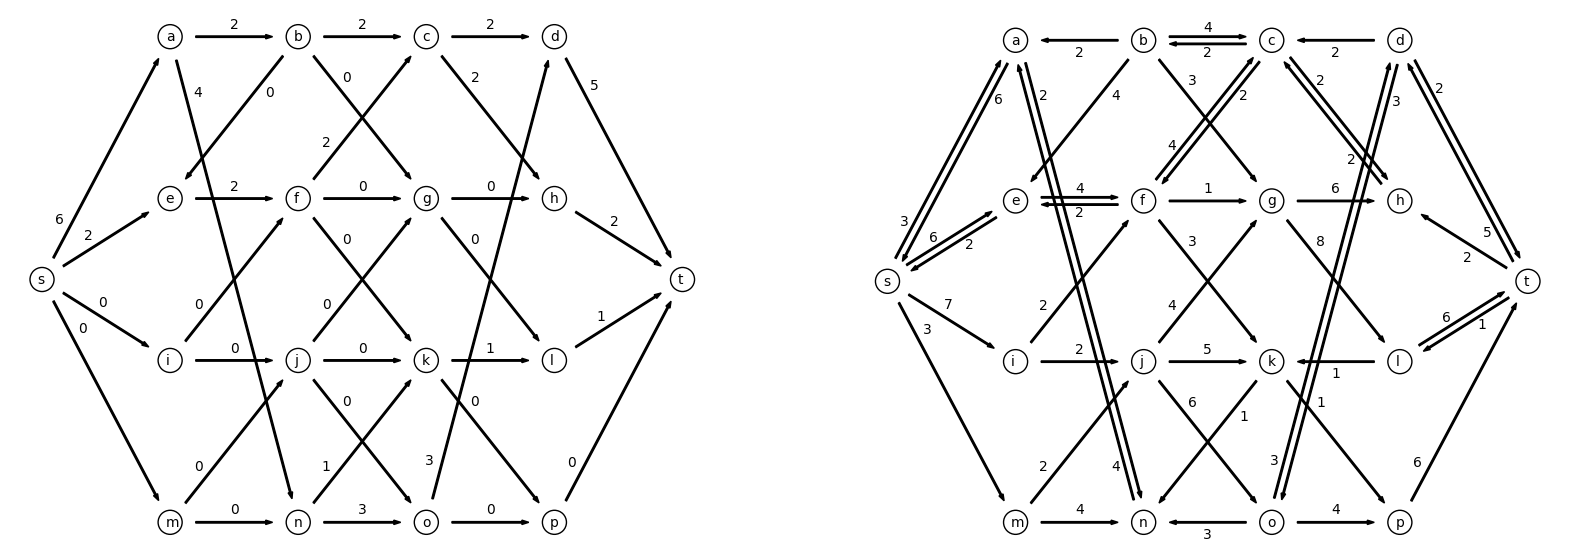

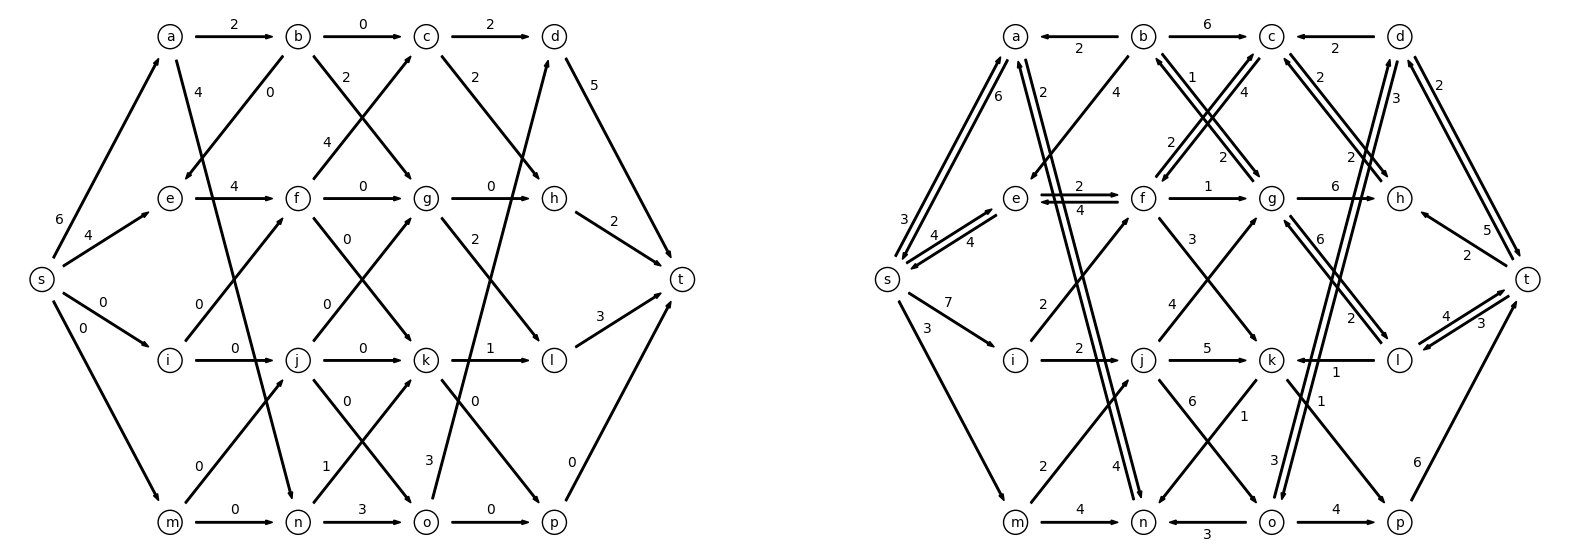

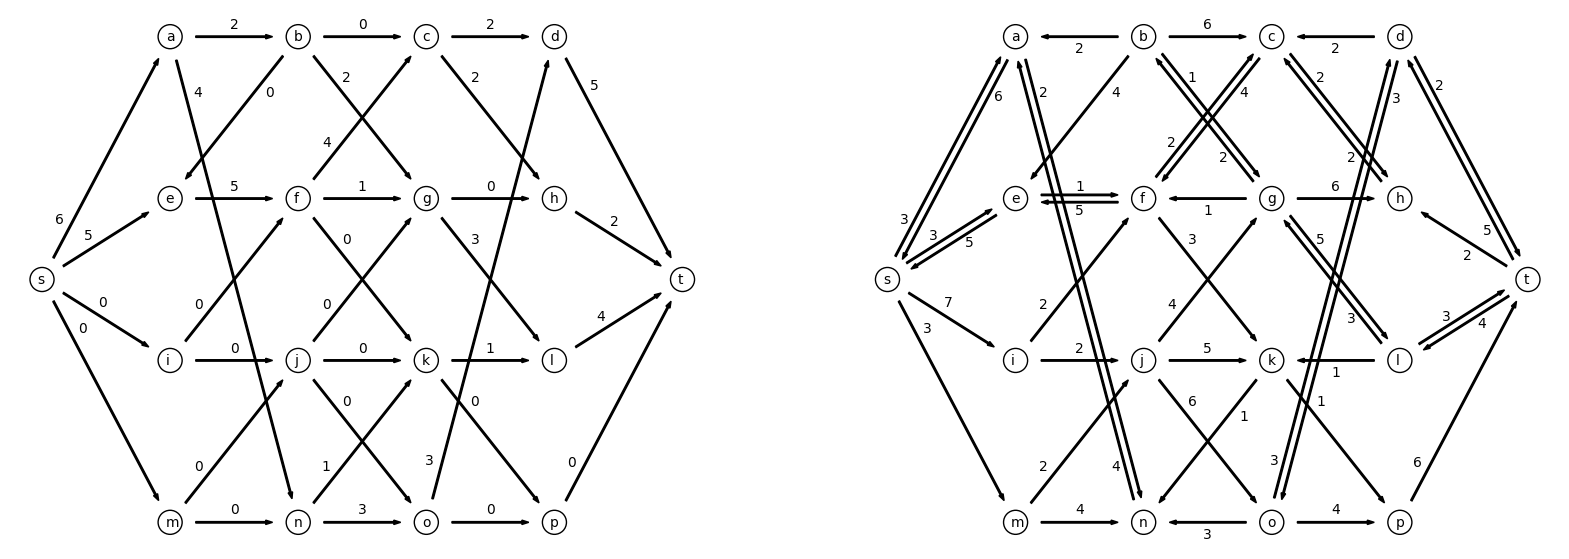

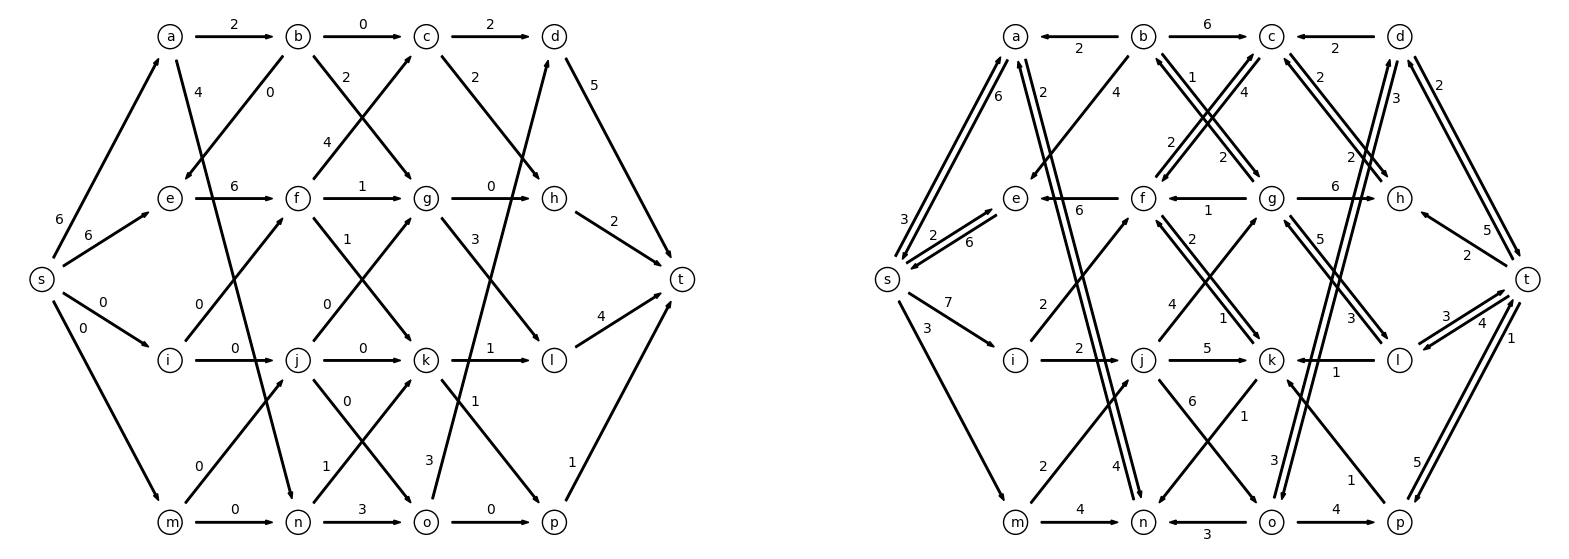

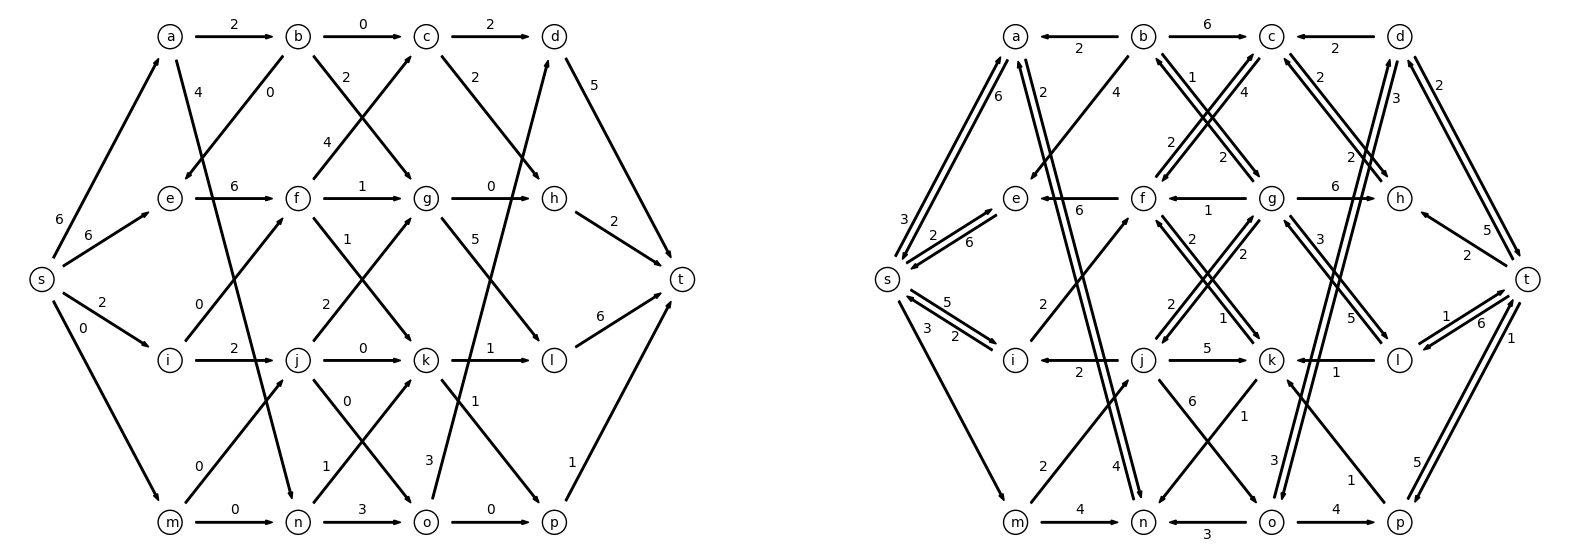

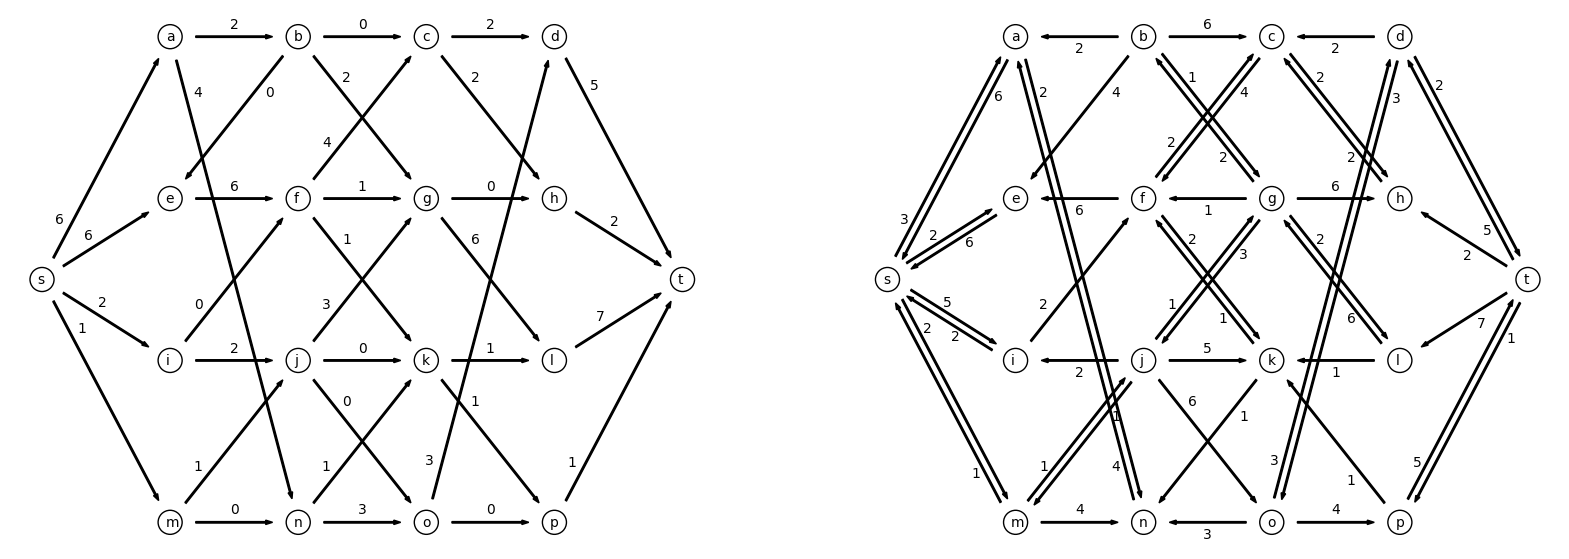

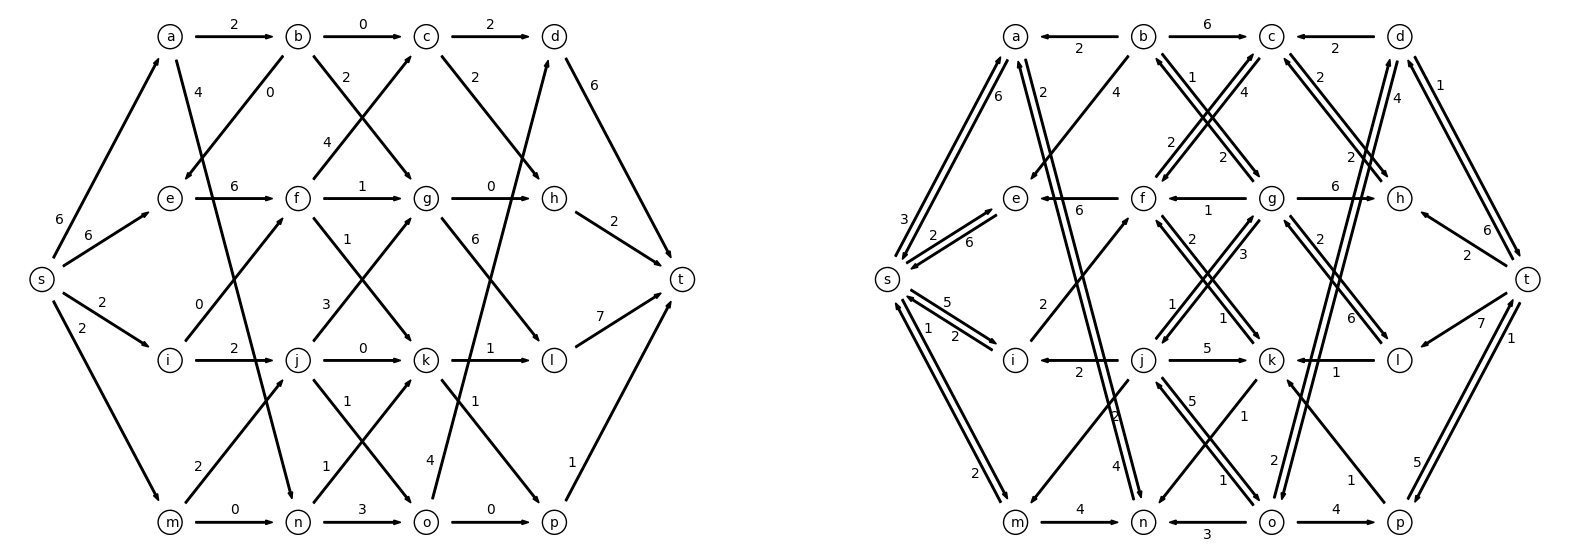

16

In [3]:
mf = MaximalFlow(vertices, capacity, name='cw1', save_fig=True)
mf.find_maximal_flow(draw_intermediate=True)
mf.get_minimal_cut_value()